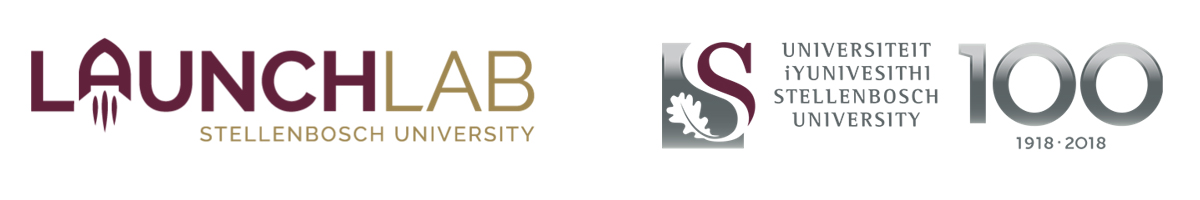

# Assignment \#4: Importing and Cleaning Data
The following questions are based on the data from 'sensors.csv' and 'readings.csv'

'sensors.csv' contains the coordinates for weather sensors used to record the temperature for a given time.

'reading.csv' stores the temperature reading together with the time for a given sensor.

The data, however, requires cleaning before it can be analysed. Execute the following cells to examine the raw data.

In [91]:
# imports
import pandas as pd
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

sensors = pd.read_csv('sensors.csv', index_col='SensorID')
readings = pd.read_csv('readings.csv', index_col='ReadingID')

sensors

,StationName,StationLocation
SensorID,,
0,SpokaneSwingBridge,"(-122.351743, 47.571389)"
1,NE45StViaduct,"(-122.301929, 47.66127)"
2,AlbroPlaceAirportWay,"(-122.314114, 47.547426)"
6,HarborAveUpperNorthBridge,"(-122.370873, 47.571695)"
21,RooseveltWay_NE80thSt,"(-122.31765, 47.692098)"
51,35thAveSW_SWMyrtleSt,"(-122.37658, 47.53918)"
81,MagnoliaBridge,"(-122.387341, 47.633454)"
102,AuroraBridge,"(-122.347278, 47.643174)"


As you can see the dataframe 'sensors' currenlty stores both the latitude and longitude for a sensor within the same column. 

Start off by writing code to seperate this into two columns namely, "Latitude" and "Longitude"

In [56]:
sensors[['Lat','Long']] = sensors.StationLocation.str.split(expand=True)
sensors = sensors.drop(columns=['StationLocation'])
#sensors['Lat','Long'] = sensors[['Lat','Long']].astype(str).str.replace(r',()', '')
print(sensors)

                        StationName            Lat        Long
SensorID                                                      
0                SpokaneSwingBridge  (-122.351743,  47.571389)
1                     NE45StViaduct  (-122.301929,   47.66127)
2              AlbroPlaceAirportWay  (-122.314114,  47.547426)
6         HarborAveUpperNorthBridge  (-122.370873,  47.571695)
21            RooseveltWay_NE80thSt   (-122.31765,  47.692098)
51             35thAveSW_SWMyrtleSt   (-122.37658,   47.53918)
81                   MagnoliaBridge  (-122.387341,  47.633454)
102                    AuroraBridge  (-122.347278,  47.643174)


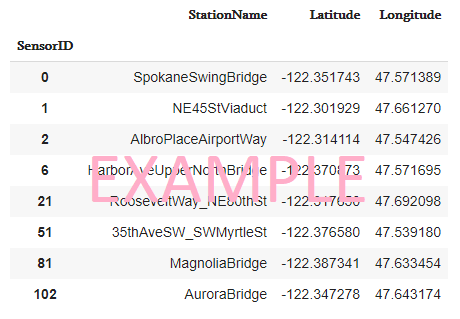

In [58]:
display(Image(filename='ex1.png'))

Next we can move on to the temperature readings. Below we see that the readings require some cleaning. 

Firstly, the date time format must be cleaned to be used for queries. To do so we must convert the dtype to datetime64\[ns\]. 
(hint: pandas has a built in function to perform this)

Secondly, the temperature must be converted from Fahrenheit to Celsius.

In [92]:
readings.head()

,StationName,DateTime,RoadSurfaceTemperature,AirTemperature
ReadingID,,,,
0,SpokaneSwingBridge,2019-09-18T02:02:00.000,57.45,61.86
1,NE45StViaduct,2019-09-18T15:12:00.000,78.25,68.40
2,AlbroPlaceAirportWay,2019-09-17T02:17:00.000,18.76,27.24
3,AlbroPlaceAirportWay,2019-09-17T02:18:00.000,18.77,27.28
4,AlbroPlaceAirportWay,2019-09-17T02:19:00.000,18.78,27.30


In [66]:
# insert code here to clean the DateTime column to be of type datetime64[ns]

pd.to_datetime(readings['DateTime'])

ReadingID
0      2019-09-18 02:02:00
1      2019-09-18 15:12:00
2      2019-09-17 02:17:00
3      2019-09-17 02:18:00
4      2019-09-17 02:19:00
               ...        
3661   2019-09-18 03:29:00
3662   2019-09-18 03:30:00
3663   2019-09-18 03:31:00
3664   2019-09-18 03:32:00
3665   2019-09-18 03:33:00
Name: DateTime, Length: 3666, dtype: datetime64[ns]

In [99]:
# insert code here to convert Fahrenheit to Celsius

for line in readings['AirTemperature']:
    ( - 32) * (5/9)

NameError: name 'AirTemperature' is not defined

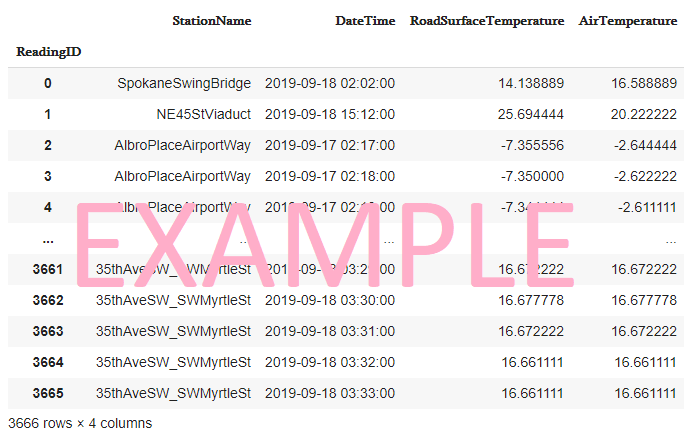

In [96]:
# print the final table
display(Image(filename='ex2.png'))

# Selecting the appropriate data
Now that the data has been cleaned. We can analyse only that which is necessary.

For the rest of this assignment we are only interested in the measurements that took place on 2019-09-17 between 14:00 and 15:00.

Write code below to drop all entries outside of the indicated time.

In [145]:
# insert code to drop all entries outside the specified time
#readings[~readings['DateTime'].isin([pd.Timestamp('20190917T1400'), pd.Timestamp('20190917T1500')])]
#readings[~(readings['DateTime'] > '2019-09-17 14:00:00') & (readings['DateTime'] < '2019-09-17 15:00:00')]
#readings.head()

#readings = readings.loc[readings["DateTime"] > "2019-09-17"]
#print(readings)

print(readings.loc['2019-09-17':'2019-09-18'])

Empty DataFrame
Columns: [StationName, DateTime, RoadSurfaceTemperature, AirTemperature]
Index: []


# Missing values
Now that we have the portion of data we want to work with,
we can check if there are any missing values within the remaining data.

Display all entries which have missing values below.

In [5]:
# insert code to display all null records containing null values



# Discuss the following

There are several strategies one can follow to combat missing values. 

Discuss in this cell, why simply imputing the mean of all recorded temperatures would not be a fitting solution in this case.

#Answer: replacing NA values with the mean since the standard errors of statistical estimates will be lower than what they may otherwise have been. Furthermore, a smaller variance in the data would mean that we are introducing bias to the results

# Drop Null Values
We have decided to drop the entries containg null values, instead of imputing them.

In [6]:
# write the code below te drop all null values and print out the resulting dataframe

# Perform the panda equivalent operations of SQL queries
Next you will be given a SQL query which you are tasked with executing, by using the equivalent pandas functions.
Ensure that you are working with only the data that took place on 2019-09-17 between 14:00 and 15:00.

Write code below to perform the SQL query using the pandas library:

## Query 1:

SELECT StationName, AVG(RoadSurfaceTemperature), AVG(AirTemperature)

FROM readings

GROUP BY StationName

In [7]:
# write the equivalent SQL operation using pandas functions and display the resulting dataframe

## Query 2:
SELECT StationName, COUNT(*) as No_Readings

FROM readings

GROUP BY StationName

In [8]:
# write the equivalent SQL operation using pandas functions and display the resulting dataframe


## Query 3:

SELECT StationName,  AVG(RoadSurfaceTemperature), AVG(AirTemperature) Latitude, Longitude

FROM readings

GROUP BY StationName

JOIN sensors 

ON readings.StationName = sensors.StationName


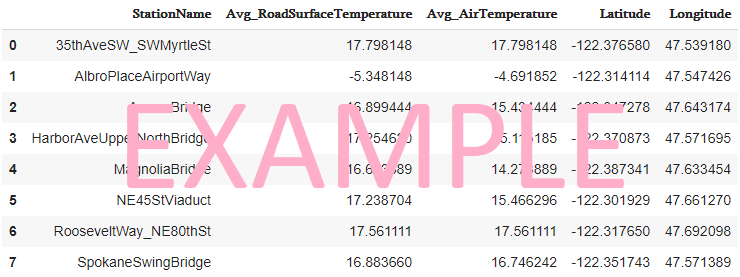

In [3]:
# write the equivalent SQL operation using pandas functions and display the resulting dataframe
display(Image(filename='src/ex3.png'))

# Discuss the following
Now say we wanted to add an additional column to describe the status of a reading for a given sensor:

A sensor's reading can be assigned one of the following tags: {Fluctuating, Consistent}.

## Why would the following strategy be faulty?

Add one additional column to the dataframe, assigning either {1, or 2} to each record to represent {Fluctuating, Consistent} for the given reading.
 
 *write your answer here*



# One-hot encoding
The correct procedure to follow, is to one-hot encode the status of a sensor.

Write code in the cell below to add the status of a reading according to the following restraints:

If 'RoadSurfaceTemperature' and 'AirTemperature' differs with a value greater than 1°C, then assign it the tag of 'Fluctuating', otherwise 'Consistent' through one hot encoding.

Once again only use the measurements that took place on 2019-09-17 between 14:00 and 15:00 after excluding null values. 

Display the first 30 entries of the dataframe afterwards

In [ ]:
# insert code here

# Text preprocessing
Finally we will be looking at an example of text preprocessing for natural language processing. Before text can be parsed to a model it must first be normalised. This mean that all punctuation must be removed, all characters must be lowercase and any whitespacing removed. 

Below there are three functions that must be completed. Each funtions takes in the words in the corpus one by one and formats as required.

## Function to_lowercase(word): 
In the first function any uppercase letters must be converted into lowercase.

## Function remove_punctuation(word): 
The second function removes any punctuation from the word. There are many ways to achieve this. Refrain from using any imported libraries. If the entirety of the word is punctuation, simply return an empty string.

## Function remove_newline(word): 
The final functions checks for any newline characters ('\n') in a given word and removes it. If the word is only made up of a newline character, simply return an empty string.



In [1]:
# Functions
def to_lowercase(word):
    # insert code here

    return word

def remove_punctuation(word):
    # insert code here

    return word

def remove_newline(word):
    # insert code here

    return word

# Read file
corpus = open('src/corpus.txt', 'r', encoding="utf8")
words = []

# Tokenize words
for line in corpus:
    for word in line.split(' '):
        
        #preprocess words
        word = to_lowercase(word)
        word = remove_punctuation(word)
        word = remove_newline(word)
        
        if word != '':
            words.append(word)

# Display words
print(words)
corpus.close()

['To', 'go', 'in', 'the', 'wrong', 'direction', 'delays', 'our', 'journey', 'and', 'brings', 'fatigue,', 'but', 'that', 'fatigue', 'may', 'teach', 'us', 'needed', 'lessons.\n', '\n', 'Man', 'seeks', 'happiness', 'through', 'outer', 'things,', 'hoping', 'to', 'find', 'it', 'in', 'wealth,', 'excitement,', 'travel,', 'self-gratification,', 'and', 'in', 'countless', 'other', 'ways', 'that', 'the', 'age-long', 'experience', 'of', 'men', 'have', 'proved', 'to', 'be', 'ineffectual;', 'but', 'he', 'usually', 'forgets', 'that', 'the', 'wellspring', 'of', 'happiness', 'is', 'within.', 'Long', 'before', 'Solomon', 'had', 'announced', 'that', '“this', 'also', 'is', 'vanity', 'and', 'vexation', 'of', 'spirit,”', 'men', 'had', 'observed', 'that', 'riches', 'do', 'not', 'bring', 'happiness;', 'that', 'excitement', 'wearies', 'us,', 'that', 'travel', 'is', 'unsatisfying,', 'and', 'that', 'gratification', 'of', 'the', 'senses', 'ends', 'in', 'exhaustion.\n', '\n', 'At', 'last,', 'in', 'despair', 'of', 

# Counting the frequencies of words
After the text has been preprocessed, the next step would be counting the frequencies of n-grams. In this case we are only looking at unigrams (i.e. the frequencies of the words themselves).

Write code below to count the frequencies and store them in a dictionary. 


The key of the dictionary being the word itself with the corresponding value the frequency.

Thereafter display the word with the highest frequencies count.

In [18]:
frequencies = {}

# insert code here

print(frequencies)

In [ ]:
# display the word with the highest frequency